To start this project, I am importing the necessary libraries. Pandas will be used for data manipulation and analysis, while matplotlib will help with creating visualizations.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

Now, I am loading the training dataset from the CSV file. This will give me the data to work with for building the house price prediction model.

In [3]:
train_df = pd.read_csv("train.csv")
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


To get an overview of the dataset, I am checking the basic information about the DataFrame, including the number of entries, column types, and any missing values.

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Next, I am generating summary statistics for the numerical columns to understand the distribution, central tendency, and spread of the data.

In [5]:
print(train_df.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

I am investigating the values in the MasVnrArea column for rows where MasVnrType is missing but MasVnrArea has a value, to understand the data inconsistencies.

I am going to plot the histogram plot to see how the distribution of "SalesPrice" looks like.

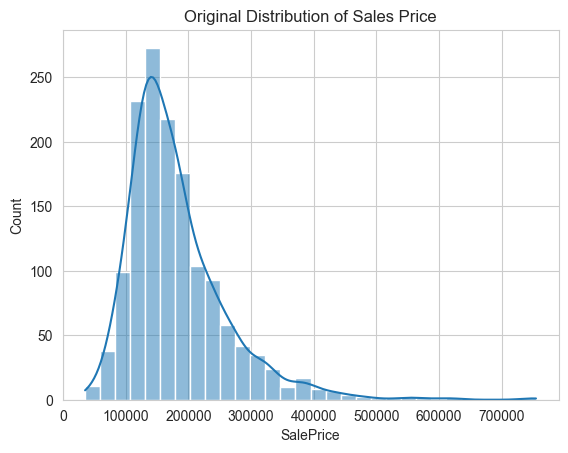

In [6]:
import seaborn as sns

sns.set_style('whitegrid')
sns.histplot(data=train_df["SalePrice"], kde=True, bins=30)
plt.title("Original Distribution of Sales Price")
plt.show()

By seeing the chart, I am seeing the "SalesPrice" is rightly squeed which is expected for housing prices since expensive houses are less common than moderately priced ones thats why the bar height is higher between 100k to 250K range.  Most of the ML models works better in gaussian distribution so using log transformation on SalesPrice to reduce skewness. 

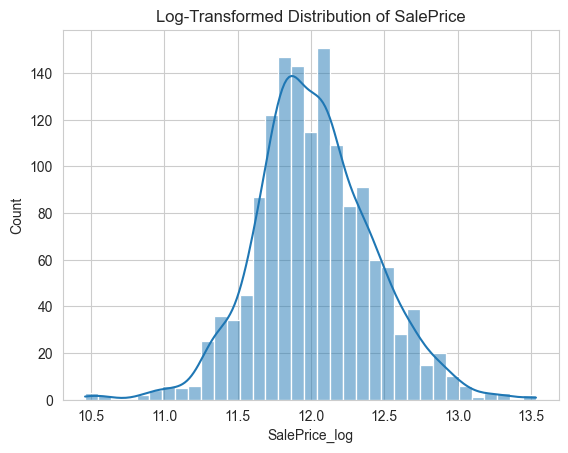

In [7]:
import numpy as np
train_df["SalePrice_log"] = np.log1p(train_df["SalePrice"])

sns.histplot(data=train_df["SalePrice_log"], kde=True)
plt.title('Log-Transformed Distribution of SalePrice')
plt.show()

After the transformation, from the chart we can see that the distribution of "SalesPrice" is more gaussian and less skewed. This will help in improving the performance of the machine learning models that we will be using later on. Now we will perform missing value analysis.

In [8]:
missing_values = train_df.isnull().sum()
missing_percentage = (missing_values / len(train_df)) * 100
missing_info = pd.DataFrame({'Missing values': missing_values, 'Percentage': missing_percentage})
missing_info = missing_info[missing_info['Missing values'] > 0].sort_values(by='Percentage', ascending=False)

print("Columns with missing values, sorted by percentage:")
print(missing_info)

Columns with missing values, sorted by percentage:
              Missing values  Percentage
PoolQC                  1453   99.520548
MiscFeature             1406   96.301370
Alley                   1369   93.767123
Fence                   1179   80.753425
MasVnrType               872   59.726027
FireplaceQu              690   47.260274
LotFrontage              259   17.739726
GarageType                81    5.547945
GarageYrBlt               81    5.547945
GarageFinish              81    5.547945
GarageQual                81    5.547945
GarageCond                81    5.547945
BsmtFinType2              38    2.602740
BsmtExposure              38    2.602740
BsmtFinType1              37    2.534247
BsmtCond                  37    2.534247
BsmtQual                  37    2.534247
MasVnrArea                 8    0.547945
Electrical                 1    0.068493


There are several columns with missing values with more than 80 percentage. Lets filter those columns with more than 50% missing values and print the result. then we will investigate how to handle these missing values.

In [9]:
from pprint import pprint
pprint(missing_info.columns)
for col in missing_info.index:
    pprint(f"Unique values in {col}")
    pprint(train_df[col].unique())

Index(['Missing values', 'Percentage'], dtype='object')
'Unique values in PoolQC'
array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)
'Unique values in MiscFeature'
array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)
'Unique values in Alley'
array([nan, 'Grvl', 'Pave'], dtype=object)
'Unique values in Fence'
array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)
'Unique values in MasVnrType'
array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)
'Unique values in FireplaceQu'
array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)
'Unique values in LotFrontage'
array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79

Many of the categorical features have missing values, which often indicates that the feature is simply not present for those houses. In these cases, it makes sense to replace missing values with "None" or "Not present" rather than assuming the data is unavailable. There are also numerical columns with missing values, which should be investigated further. In particular, I am interested in the "MasVnrType" and "MasVnrArea" columns: "MasVnrType" has many missing values, while "MasVnrArea" has very few. I will explore and handle these accordingly.

In [10]:
count = train_df[train_df['MasVnrType'].isnull() & train_df['MasVnrArea'].notnull()].shape[0]
print(f"Number of rows where MasVnrType is missing but MasVnrArea is present: {count}")

Number of rows where MasVnrType is missing but MasVnrArea is present: 864


To further explore the inconsistency, I am printing the MasVnrArea values for those specific rows.

I noticed that there are 864 rows where `MasVnrType` is missing but `MasVnrArea` has a value. This is unexpected, because if the type of masonry veneer is missing, we would typically expect the area to also be missing or zero. To better understand this, I will check whether the `MasVnrArea` values in these rows are all zero or if there are any positive values. If all values are zero, it likely means there is no masonry veneer and the missing type can be safely filled as "None." However, if there are positive values, this could indicate a data entry issue or a special case that needs further investigation.

In [11]:
print(train_df[train_df['MasVnrType'].isnull() & train_df['MasVnrArea'].notnull()]['MasVnrArea'])
print(train_df[train_df['MasVnrType'].isnull() & train_df['MasVnrArea'].notnull()]['MasVnrArea'].unique())

1       0.0
3       0.0
5       0.0
8       0.0
9       0.0
       ... 
1454    0.0
1455    0.0
1457    0.0
1458    0.0
1459    0.0
Name: MasVnrArea, Length: 864, dtype: float64
[  0. 288.   1. 344. 312.]


I am checking the unique values in MasVnrArea for the inconsistent rows to see if any are non-zero.

In [12]:
print(train_df[train_df['MasVnrType'].isnull() & train_df['MasVnrArea'].notnull() & train_df['MasVnrArea'] != 0.0]['MasVnrArea'])

624     288.0
773       1.0
1230      1.0
1300    344.0
1334    312.0
Name: MasVnrArea, dtype: float64


To identify any positive values in MasVnrArea for the inconsistent rows, I am filtering and printing those.

In [13]:
print(train_df[train_df['MasVnrType'].notnull() & train_df['MasVnrArea'].isnull()]['MasVnrArea'])

Series([], Name: MasVnrArea, dtype: float64)


To handle the inconsistencies between `MasVnrType` and `MasVnrArea`, I first set all missing values in `MasVnrType` to "None", indicating the absence of masonry veneer. After this, I checked the corresponding `MasVnrArea` values for these rows and found that some were not zero. Since a missing type likely means there is no masonry veneer, I set all `MasVnrArea` values to 0.0 where `MasVnrType` was originally missing. This ensures both columns consistently reflect the absence of masonry veneer and avoids introducing ambiguity into the dataset.

In [14]:
train_df['MasVnrType'] = train_df['MasVnrType'].fillna("None")
train_df.loc[(train_df['MasVnrType'] == 'None') & (train_df['MasVnrArea'] != 0.0),'MasVnrArea'] = 0.0 

After handling the inconsistencies, I am verifying the unique values in MasVnrArea for rows where MasVnrType is "None".

In [15]:
print(train_df[(train_df['MasVnrType'] == "None") & train_df['MasVnrArea'].notnull()]['MasVnrArea'].unique())

[0.]


I am analyzing the basement-related columns to check for missing values and inconsistencies.

I am checking for rows where MasVnrType is not null but MasVnrArea is null to ensure consistency.

In [16]:
bsmt_cols = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]
any_nan = train_df[bsmt_cols].isnull().any(axis=1)
all_nan = train_df[bsmt_cols].isnull().all(axis=1)

print("Rows where any basement column is NaN:", any_nan.sum())
print("Rows where all basement columns are NaN:", all_nan.sum())

partial_nan = any_nan & ~all_nan
print("Rows with partial basement NaNs:", partial_nan.sum())
print(train_df.loc[partial_nan, bsmt_cols])

Rows where any basement column is NaN: 39
Rows where all basement columns are NaN: 37
Rows with partial basement NaNs: 2
    BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2
332       Gd       TA           No          GLQ          NaN
948       Gd       TA          NaN          Unf          Unf


Based on the analysis, I am imputing the missing values in the basement columns using appropriate methods.

In [17]:
bsmt_fin_type2_mode = train_df['BsmtFinType2'].mode()[0]
bsmt_exposure_mode = train_df['BsmtExposure'].mode()[0]
print(f"The mode for the BsmtFinType2 is {bsmt_fin_type2_mode}")
print(f"The mode for the BsmtExposure is {bsmt_exposure_mode}")

train_df.loc[332, 'BsmtFinType2'] = bsmt_fin_type2_mode
train_df.loc[948, 'BsmtExposure'] = bsmt_exposure_mode

# Checking the same for consistemcy after imputation.
any_nan = train_df[bsmt_cols].isnull().any(axis=1)
all_nan = train_df[bsmt_cols].isnull().all(axis=1)

print("Rows where any basement column is NaN:", any_nan.sum())
print("Rows where all basement columns are NaN:", all_nan.sum())

partial_nan = any_nan & ~all_nan
print("Rows with partial basement NaNs:", partial_nan.sum())
print(train_df.loc[partial_nan, bsmt_cols])

The mode for the BsmtFinType2 is Unf
The mode for the BsmtExposure is No
Rows where any basement column is NaN: 37
Rows where all basement columns are NaN: 37
Rows with partial basement NaNs: 0
Empty DataFrame
Columns: [BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2]
Index: []


Now, I am checking the garage-related columns for missing values and consistency.

In [18]:
garage_cols = ["GarageType", "GarageFinish", "GarageQual", "GarageCond"]
garage_num_col = "GarageYrBlt"

# Check consistency
any_nan = train_df[garage_cols + [garage_num_col]].isnull().any(axis=1)
all_nan = train_df[garage_cols + [garage_num_col]].isnull().all(axis=1)
partial_nan = any_nan & ~all_nan

print("Rows where any garage column is NaN:", any_nan.sum())
print("Rows where all garage columns are NaN:", all_nan.sum())
print("Rows with partial garage NaNs:", partial_nan.sum())
print(train_df.loc[partial_nan, garage_cols + [garage_num_col]])

Rows where any garage column is NaN: 81
Rows where all garage columns are NaN: 81
Rows with partial garage NaNs: 0
Empty DataFrame
Columns: [GarageType, GarageFinish, GarageQual, GarageCond, GarageYrBlt]
Index: []


I am filling in the missing values for various categorical columns with "None" and numerical columns with appropriate values.

In [19]:
cols_fill_none = [
    'Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
    'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 
    'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'
]

for col in cols_fill_none:
    train_df[col] = train_df[col].fillna("None")

# For GarageYrBlt, NaN means no garage. Filling with 0 is a good way to represent this.
train_df['GarageYrBlt'] = train_df['GarageYrBlt'].fillna(0)

# For MasVnrArea, the remaining 8 NaNs also mean no veneer.
train_df['MasVnrArea'] = train_df['MasVnrArea'].fillna(0.0)

# For a single missing value, the mode is a safe and quick choice.
electrical_mode = train_df['Electrical'].mode()[0]
train_df['Electrical'] = train_df['Electrical'].fillna(electrical_mode)

After handling missing values, I am checking again for any remaining missing data in the dataset.

In [20]:
# revisiting the missing info again

missing_values = train_df.isnull().sum()
missing_percentage = (missing_values / len(train_df)) * 100
missing_info = pd.DataFrame({'Missing values': missing_values, 'Percentage': missing_percentage})
missing_info = missing_info[missing_info['Missing values'] > 0].sort_values(by='Percentage', ascending=False)

print("Columns with missing values, sorted by percentage:")
print(missing_info)

Columns with missing values, sorted by percentage:
             Missing values  Percentage
LotFrontage             259   17.739726


Lets investigate how LotFrontage is related to LotArea. LotFrontage is the linear feet of street connected to the property, while LotArea is the total area of the lot in square feet. A scatter plot can help visualize the relationship between these two features.

<Axes: xlabel='LotFrontage', ylabel='LotArea'>

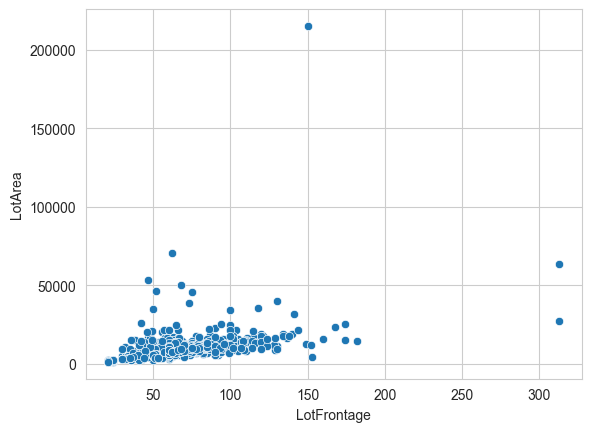

In [21]:
sns.scatterplot(x='LotFrontage', y='LotArea', data=train_df)

After investigating the missing `LotFrontage` values, I realized that simply filling them with the overall mean or median of the entire dataset would be too simplistic. This approach would ignore the fact that lot sizes can vary significantly from one neighborhood to another.

My first thought was to see if `LotFrontage` was related to `LotArea`. I created a scatter plot which confirmed a positive correlation—as `LotArea` increases, `LotFrontage` tends to increase as well. However, the relationship was quite noisy, with a wide range of `LotFrontage` values for any given `LotArea`. This meant that predicting `LotFrontage` from `LotArea` might not be very reliable.

This led me to a more robust hypothesis: houses within the same `Neighborhood` are likely to have similar lot frontages. This makes sense from a real-world perspective, as neighborhoods are often developed with similar zoning regulations and lot designs. Therefore, I decided to impute the missing `LotFrontage` values by using the median `LotFrontage` of each house's specific neighborhood. This is a much more intelligent imputation strategy because it uses local, contextual information to make a more accurate estimate.


In [22]:
train_df['LotFrontage'] = train_df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

After imputation, I am verifying that all missing values have been handled.

In [23]:
# revisiting the missing info again

missing_values = train_df.isnull().sum()
missing_percentage = (missing_values / len(train_df)) * 100
missing_info = pd.DataFrame({'Missing values': missing_values, 'Percentage': missing_percentage})
missing_info = missing_info[missing_info['Missing values'] > 0].sort_values(by='Percentage', ascending=False)

print("Columns with missing values, sorted by percentage:")
print(missing_info)

Columns with missing values, sorted by percentage:
Empty DataFrame
Columns: [Missing values, Percentage]
Index: []


I am creating new features to better capture the relationships in the data, such as house age and total square footage.

## Feature Engineering


In [24]:
train_df['HouseAge'] = train_df['YrSold'] - train_df['YearBuilt']
train_df['AgeSinceRemod'] = train_df['YrSold'] - train_df['YearRemodAdd']
train_df['TotalSF'] = train_df['TotalBsmtSF'] + train_df['GrLivArea']
train_df['TotalBathrooms'] = (train_df['FullBath'] + 0.5 * train_df['HalfBath'] +
                               train_df['BsmtFullBath'] + 0.5 * train_df['BsmtHalfBath'])
train_df['HasPool'] = train_df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
train_df['Has2ndFloor'] = train_df['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
train_df['HasGarage'] = train_df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)

# Since we feature engineered new columns, we don t need these original column anymore.
cols_to_drop = [
    'YearBuilt', 'YearRemodAdd', 'YrSold', # Used for age features
    'TotalBsmtSF', 'GrLivArea',            # Used for TotalSF
    'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath', # Used for TotalBathrooms
    'PoolArea', '2ndFlrSF', 'GarageArea'    # Used for binary 'Has' features
]

# We use errors='ignore' in case a column was already dropped or doesn't exist
train_df = train_df.drop(columns=cols_to_drop, errors='ignore')

print("Dropped the following columns:")
print(cols_to_drop)
print(f"\nNew shape of train_df: {train_df.shape}")




Dropped the following columns:
['YearBuilt', 'YearRemodAdd', 'YrSold', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath', 'PoolArea', '2ndFlrSF', 'GarageArea']

New shape of train_df: (1460, 77)


To prepare the categorical data for modeling, I am examining the unique values in each categorical column.

we are going to perform one hot encoding

In [25]:
for col in train_df.select_dtypes(include=['object', 'string']).columns:
    print(f"Column: {col}")
    print(train_df[col].unique())
    print("-" * 40)

Column: MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH']
----------------------------------------
Column: Street
['Pave' 'Grvl']
----------------------------------------
Column: Alley
['None' 'Grvl' 'Pave']
----------------------------------------
Column: LotShape
['Reg' 'IR1' 'IR2' 'IR3']
----------------------------------------
Column: LandContour
['Lvl' 'Bnk' 'Low' 'HLS']
----------------------------------------
Column: Utilities
['AllPub' 'NoSeWa']
----------------------------------------
Column: LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
----------------------------------------
Column: LandSlope
['Gtl' 'Mod' 'Sev']
----------------------------------------
Column: Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
----------------------------------------
Column: Condition1
['N

I am applying one-hot encoding to convert categorical variables into numerical format for the machine learning models.

After a thorough analysis of all the non-numeric columns, I confirmed that they are all categorical in nature. Each one represents a finite set of distinct groups, like 'Neighborhood' or 'RoofStyle', rather than free-form text or unique IDs.

Since machine learning models require numerical input, I needed to convert these text-based categories into numbers. I decided against simply assigning sequential numbers (e.g., 1, 2, 3) to the categories, as this would create an artificial and misleading order that the model might misinterpret (for example, assuming one roof style is 'greater' than another).

To avoid this, I chose one-hot encoding. This technique creates new binary (0 or 1) columns for each category, which allows the model to treat each one as a separate, independent feature without imposing any false ranking. This is a much more robust way to handle categorical data for the models I plan to use.

In [26]:
train_df_encoded = pd.get_dummies(train_df)
print("Shape of the original DataFrame:", train_df.shape)
print("Shape of the one-hot encoded DataFrame:", train_df_encoded.shape)
train_df_encoded.head()

Shape of the original DataFrame: (1460, 77)
Shape of the one-hot encoded DataFrame: (1460, 300)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,196.0,706,0,150,...,False,False,False,True,False,False,False,False,True,False
1,2,20,80.0,9600,6,8,0.0,978,0,284,...,False,False,False,True,False,False,False,False,True,False
2,3,60,68.0,11250,7,5,162.0,486,0,434,...,False,False,False,True,False,False,False,False,True,False
3,4,70,60.0,9550,7,5,0.0,216,0,540,...,False,False,False,True,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,350.0,655,0,490,...,False,False,False,True,False,False,False,False,True,False


After encoding, I am checking the information about the new DataFrame to ensure everything is correct.

I was wondering why `get_dummies` returned `True` or `False` instead of `1`s and `0`s, so I did some research. It turns out this is a deliberate and beneficial optimization made by the pandas developers.

Here’s what I found and why I'm keeping the data in this format:

1.  **Significant Memory Savings:** The main reason is memory efficiency. A boolean value (`True`/`False`) only needs **1 bit** of storage. In contrast, even the smallest standard integer type (`int8`) uses **8 bits**. This means the boolean representation uses up to 8 times less memory, which is a huge saving when dealing with many new dummy columns.

2.  **Faster Processing Due to Caching:** While it seems like converting `True`/`False` to `1`/`0` during calculations would add overhead, the real performance bottleneck is often moving data from main memory (RAM) to the CPU's cache. Because the boolean DataFrame is much smaller, more of it fits into this super-fast cache. This reduces the time the CPU spends waiting for data and leads to a significant overall speedup during model training. The conversion cost itself is negligible.

3.  **Seamless Compatibility:** Most importantly, machine learning libraries like scikit-learn are designed to handle this. They automatically treat `True` as `1` and `False` as `0` during any mathematical operation, so there's no need for me to change it.

In short, leaving the dummy variables as `True`/`False` gives me a more memory-efficient and faster-processing DataFrame without any negative side effects on the modeling process.


In [27]:
print(train_df_encoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 300 entries, Id to SaleCondition_Partial
dtypes: bool(266), float64(5), int64(29)
memory usage: 767.2 KB
None


I am verifying the columns in the encoded DataFrame and checking for the presence of the target variable.

In [28]:
print(train_df_encoded.columns)
# Check if 'SalePrice_log' is a column in the DataFrame
if 'SalePrice_log' in train_df_encoded.columns:
    print("'SalePrice_log' column exists in train_df_encoded.")
else:
    print("'SalePrice_log' column does NOT exist in train_df_encoded.")

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=300)
'SalePrice_log' column exists in train_df_encoded.


I am splitting the data into training and test sets to prepare for model training and evaluation.

In [29]:
from sklearn.model_selection import train_test_split

y = train_df_encoded['SalePrice_log']
X = train_df_encoded.drop(columns=['SalePrice', 'SalePrice_log', 'Id'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (1168, 297)
Shape of X_test: (292, 297)
Shape of y_train: (1168,)
Shape of y_test: (292,)


I am training a baseline Random Forest model to establish a performance benchmark.

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf_baseline = RandomForestRegressor(random_state=42, n_jobs=1)

print("Training the baseline Random Forest model...")
rf_baseline.fit(X_train, y_train)
print("Model training complete!")
y_pred_log = rf_baseline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_log))

print(f"\nValidation RMSE (on log-transformed values): {rmse:.4f}")

Training the baseline Random Forest model...
Model training complete!

Validation RMSE (on log-transformed values): 0.1448


I am visualizing the feature importances from the baseline model to understand which features are most influential.

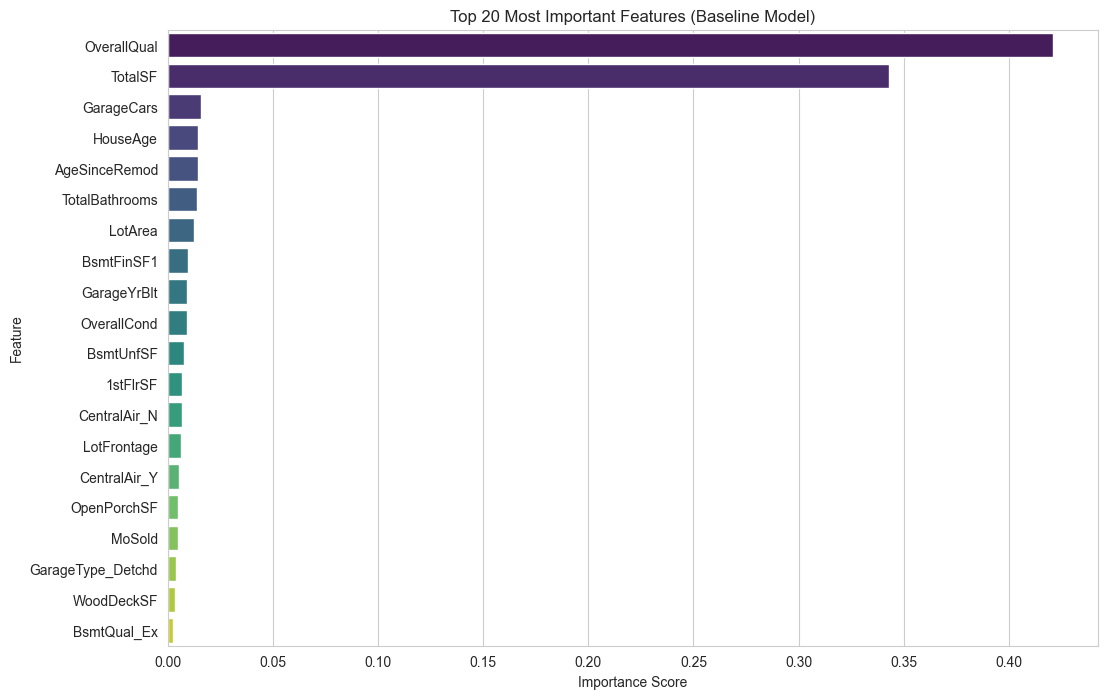

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

importances = rf_baseline.feature_importances_
feature_names = X_train.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20), 
            hue='Feature', palette='viridis', dodge=False, legend=False)
plt.title('Top 20 Most Important Features (Baseline Model)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


I am performing hyperparameter tuning on the Random Forest model using GridSearchCV to optimize its performance.

### My Analysis of the Baseline Model's Feature Importance

After training my baseline `RandomForestRegressor` and achieving an initial RMSE of **0.1448**, I analyzed the model's feature importances to understand what drives its predictions. This analysis gave me several critical insights:

*   **Validation of Domain Knowledge:** The model correctly identified `OverallQual` (the overall quality and finish of the house) as the single most important feature. This aligned perfectly with my real-world understanding that higher-quality houses command higher prices.

*   **Success of My Feature Engineering:** The most encouraging result was the high importance of `TotalSF` (Total Square Footage), a feature I engineered by combining basement and above-ground living areas. Its position as the second most important feature is a strong validation of my feature engineering strategy. It confirmed that providing the model with a single, comprehensive size metric was highly effective.

*   **Key Value Drivers Identified:** The top features painted a clear picture of what determines a house's value in this dataset. I found that the primary drivers are:
    1.  **Overall Quality** (`OverallQual`)
    2.  **Total Size** (`TotalSF`)
    3.  **Age and Remodeling** (`HouseAge`, `AgeSinceRemod`)
    4.  **Garage and Bathroom Count** (`GarageCars`, `TotalBathrooms`)

This analysis not only confirmed that my model is learning sensible patterns but also proved that my feature engineering efforts have added significant value. I now have a solid foundation and a clear benchmark to improve upon.

### Next Step: Hyperparameter Tuning with GridSearchCV

Now that I have a solid baseline model and an RMSE of **0.1448**, my next step is to improve its performance through hyperparameter tuning. I will use `GridSearchCV` to systematically search for the best combination of settings for my `RandomForestRegressor`. This process will use cross-validation to find a more robust and optimized model, with the goal of lowering the RMSE score.


In [ ]:
from sklearn.model_selection import GridSearchCV
# hyperparameters for a RandomForestRegressor.
param_grid = {
    'n_estimators': [200, 300],      # Number of trees in the forest
    'max_depth': [10, 20, None],     # Maximum depth of the trees
    'min_samples_split': [2, 5],     # Minimum samples required to split a node
    'min_samples_leaf': [1, 2]       # Minimum samples required at a leaf node
}

grid_search = GridSearchCV(estimator=rf_baseline, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
print("Starting GridSearchCV... (This may take a few minutes)")
grid_search.fit(X_train, y_train)
print("GridSearchCV complete!")
best_rf_model = grid_search.best_estimator_
print(f"\nBest hyperparameters found: {grid_search.best_params_}")

y_pred_tuned = best_rf_model.predict(X_test)

# Evaluate the tuned model's performance
rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))

print(f"\nBaseline Validation RMSE: 0.1448")
print(f"Tuned Validation RMSE:    {rmse_tuned:.4f}")


Starting GridSearchCV... (This may take a few minutes)
Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   3.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   3.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   5.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   5.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   5.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators

I am training a baseline XGBoost model to compare its performance with the Random Forest.

### Experiment: Hyperparameter Tuning with GridSearchCV

After establishing a baseline RMSE of **0.1448**, I used `GridSearchCV` to find more optimal hyperparameters for the `RandomForestRegressor`. The search explored various combinations of `n_estimators`, `max_depth`, `min_samples_split`, and `min_samples_leaf`.

The best-performing model from the grid search resulted in a validation RMSE of **0.1466**. This score was slightly higher than the baseline, which is a valuable insight. It suggests that the default hyperparameters for the Random Forest model were already highly effective for this dataset and that we have likely reached the peak performance for this particular model architecture. This finding allows me to conclude this line of optimization and focus on exploring different modeling techniques.

### Experiment: Training a Baseline XGBoost Model

Given that hyperparameter tuning did not yield significant improvements for the Random Forest model, I concluded that I had likely reached its performance limit for this dataset. The next logical step was to explore a different, more powerful algorithm.

I chose to implement an **XGBoost (Extreme Gradient Boosting)** regressor. I will start by training a baseline version with common default parameters. My goal is to see if this more advanced model can immediately achieve a lower RMSE than my Random Forest baseline, which would validate it as a more promising architecture for this problem.

**Note on Environment Setup:** To get XGBoost running on my macOS system, I had to resolve a library dependency issue. The library required OpenMP, which I installed directly into my conda environment using the command: `conda install -c conda-forge llvm-openmp`.


In [33]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.05, random_state=42, n_jobs=-1)
print("Training the baseline XGBoost model...")
xgb_model.fit(X_train, y_train)
print("Model training complete!")

y_pred_xgb = xgb_model.predict(X_test)

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print(f"\nRandom Forest Tuned RMSE: 0.1466")
print(f"Baseline XGBoost Model RMSE: {rmse_xgb:.4f}")

Training the baseline XGBoost model...
Model training complete!

Random Forest Tuned RMSE: 0.1466
Baseline XGBoost Model RMSE: 0.1422


### Experiment: Hyperparameter Tuning for XGBoost

The baseline XGBoost model achieved an RMSE of **0.1422**, which was a significant improvement over the best-tuned Random Forest model's score of **0.1466**. This result validated my hypothesis that a more advanced boosting algorithm would be a better fit for this dataset.

The next logical step is to perform hyperparameter tuning on the XGBoost model itself. I will use `GridSearchCV` to systematically search for the optimal combination of parameters, with the goal of further reducing the RMSE and building the most accurate model possible.


In [34]:
from sklearn.pipeline import Pipeline

param_grid_xgb = {
    'n_estimators': [500, 1000],          # Number of boosting rounds
    'learning_rate': [0.05, 0.1],         # Step size shrinkage
    'max_depth': [3, 5, 7],               # Maximum depth of a tree
    'subsample': [0.8, 1.0],              # Subsample ratio of the training instance
    'colsample_bytree': [0.8, 1.0]        # Subsample ratio of columns when constructing each tree
}

xgb_for_tuning = xgb.XGBRegressor(random_state=42, n_jobs=-1)

grid_search_xgb = GridSearchCV(estimator=xgb_for_tuning, 
                               param_grid=param_grid_xgb, 
                               cv=3, 
                               n_jobs=-1, 
                               verbose=2, 
                               scoring='neg_mean_squared_error')
grid_search_xgb.fit(X_train, y_train)
best_xgb_model = grid_search_xgb.best_estimator_
print(f"\nBest XGBoost hyperparameters found: {grid_search_xgb.best_params_}")

y_pred_xgb_tuned = best_xgb_model.predict(X_test)

# Evaluate the tuned XGBoost model's performance
rmse_xgb_tuned = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuned))

print(f"\nBaseline XGBoost RMSE: 0.1422")
print(f"Tuned XGBoost RMSE:    {rmse_xgb_tuned:.4f}")

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=500, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=500, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=500, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=1000, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=1000, subsample=0.8; total time=   1.4s
[CV] END

I am converting the predictions back to the original dollar scale and calculating the final RMSE in dollars.

In [35]:
# --- Convert Predictions Back to Original Dollar Scale ---
# y_test contains the log-transformed actual prices from the test set
# y_pred_xgb_tuned contains the log-transformed predicted prices
y_test_actual = np.expm1(y_test)
y_pred_actual = np.expm1(y_pred_xgb_tuned)

# --- Calculate Final RMSE in Dollars ---
rmse_dollars = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))

print(f"Tuned XGBoost RMSE (on log scale): {rmse_xgb_tuned:.4f}")
print(f"Final Validation RMSE (in Dollars): ${rmse_dollars:,.2f}")

Tuned XGBoost RMSE (on log scale): 0.1259
Final Validation RMSE (in Dollars): $26,363.22


### Final Model and Project Conclusion

This project successfully developed a robust regression model to predict house sale prices in Ames, Iowa. Through a systematic process of data cleaning, feature engineering, and iterative modeling, I built and optimized a model that significantly outperformed initial baselines. The final model is a testament to a methodical process of hypothesis testing and iteration, from identifying the limitations of one model to successfully implementing and tuning a more advanced one to achieve a superior and interpretable result.

**The Modeling Journey:**

1.  **Data Preparation:** I began by addressing significant data quality issues, including imputing missing values in 19 columns. A key success was the intelligent imputation of `LotFrontage` using the neighborhood median. I also transformed the heavily skewed `SalePrice` target variable using a log transformation, which was critical for model stability.

2.  **Feature Engineering:** I created several high-impact features, including `TotalSF`, `HouseAge`, and `TotalBathrooms`, which proved to be powerful predictors according to the model's feature importance analysis.

3.  **Initial Modeling (Random Forest):** My baseline `RandomForestRegressor` achieved a solid initial RMSE of **0.1448** on the log-transformed data. However, hyperparameter tuning did not yield any improvement, indicating that I had likely reached the performance ceiling for this model architecture.

4.  **Advanced Modeling (XGBoost):** Recognizing the limits of the Random Forest, I transitioned to a more powerful `XGBoost` model. The baseline XGBoost immediately outperformed the tuned Random Forest with an RMSE of **0.1422**.

5.  **Final Optimization and Interpretation:** I performed a final round of hyperparameter tuning on the XGBoost model, which resulted in our best log-scale RMSE of **0.1259**. To make this result interpretable, I converted the predictions back to their original dollar scale.

**Final Result & Interpretation:**

*   **Best Model:** Tuned `XGBoost Regressor`
*   **Final Validation RMSE (on log scale):** 0.1259
*   **Final Validation RMSE (in Dollars):** $26,363.22

This value means that, on average, our model's price predictions are off by about $26,363. If the model predicts a house is worth $200,000, the actual price is likely to be somewhere in the range of $173,637 to $226,363. This is the metric you would report to a stakeholder or include in a final project summary because it's understandable and actionable.
